## Bubble Plot of Ride Sharing Data

In [1]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Show plot
city_df = pd.read_csv('data/city_data.csv')
city_df.head(5)
city_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [3]:
ride_data = pd.read_csv('data/ride_data.csv')
ride_data.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
combine_data =city_df.merge(ride_data,on='city',how='outer')
combine_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
urban_data = combine_data.loc[(combine_data['type'] == 'Urban')]
subrban_data = combine_data.loc[(combine_data['type'] == 'Suburban')]
rural_data = combine_data.loc[(combine_data['type'] == 'Rural')]

## Total Fares by City Type


In [6]:
combine_data.groupby(['city']).sum().head()

,driver_count,fare,ride_id
city,,,
Amandaburgh,216,443.55,96468054851003
Barajasview,572,557.31,102893297406279
Barronchester,176,582.76,71372735666520
Bethanyland,396,593.21,105165903035418
Bradshawfurt,70,400.64,37352940220451


In [7]:
# Average Fare,count of rides,driver count
urban_city_fare =urban_data.groupby(['city'])['fare'].mean()
urban_ride = urban_data.groupby(['city'])['ride_id'].count()
urban_drivers = urban_data.groupby(['city'])['driver_count'].value_counts()

suburban_city_fare =subrban_data.groupby(['city'])['fare'].mean()
suburban_ride = subrban_data.groupby(['city']).count()['ride_id']
suburban_drivers = subrban_data.groupby(['city'])['driver_count'].value_counts()


rural_city_fare =rural_data.groupby(['city'])['fare'].mean()
rural_ride = rural_data.groupby(['city']).count()['ride_id']
rural_drivers = rural_data.groupby(['city'])['driver_count'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


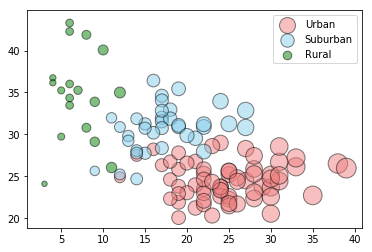

In [8]:
# Calculate Type Percents
plt.scatter(urban_ride, urban_city_fare,s=urban_drivers*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")
plt.scatter(suburban_ride, suburban_city_fare,s=suburban_drivers*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")
plt.scatter(rural_ride,rural_city_fare,s=rural_drivers*10,
            marker ='o', facecolors ="green", edgecolors='black',alpha = 0.5, label="Rural")
# Build Pie Chart

# Save Figure
plt.legend(loc="upper ")


In [2]:
# Show Figure


## Total Rides by City Type

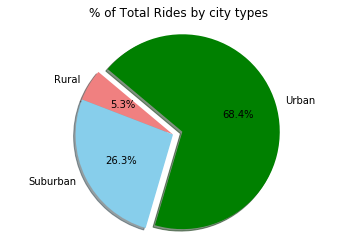

In [16]:
# Calculate Ride Percents
total_rides = combine_data.groupby(['type'])['ride_id'].count()
labels = ["Rural","Suburban","Urban" ]
colors = ["lightcoral","skyblue","green"]
explode = (0, 0, 0.1)
plt.pie(total_rides,explode=explode,labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by city types')
plt.axis("equal")
plt.savefig('Ride_Percent.png')
plt.show()
# Build Pie Chart

# Save Figure


In [3]:
# Show Figure


## Total Drivers by City Type

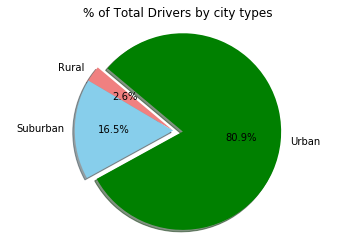

In [22]:
# Calculate Driver Percents
driver_pyber = city_df.groupby(['type'])['driver_count'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["lightcoral","skyblue","green"]
explode = (0, 0, 0.1)
plt.pie(driver_pyber,explode=explode,labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by city types')
plt.axis("equal")
plt.savefig('Driver_Percent.png')
plt.show()
# Build Pie Charts

# Save Figure


In [4]:
# Show Figure
